In [99]:

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

import statsmodels.api as sm        # for statsmodel
import xgboost

#### STEP1 : Data Acquisition 
* Loading Data
* Defining dependent & Indepdendent


In [66]:
house_prediction=pd.read_csv("9_House Price Prediction.csv")
house_prediction.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### STEP2 : Data Preparation 
* Munging
* Structure
* NaN Handling
* EDA

In [5]:
house_prediction.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
house_prediction.shape

(21613, 21)

In [7]:
house_prediction.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [67]:
house_prediction.drop(['id','zipcode','date','sqft_lot','yr_renovated','waterfront','view'],axis=1,inplace=True)
house_prediction.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,1.0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,2.0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,1.0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,1.0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,1.0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


In [9]:
house_prediction.shape


(21613, 15)

In [68]:
house_prediction.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,3.409430,7.656873,1788.390691,291.509045,1971.005136,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.650743,1.175459,828.090978,442.575043,29.373411,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [69]:
house_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   condition      21613 non-null  int64  
 6   grade          21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  lat            21613 non-null  float64
 11  long           21613 non-null  float64
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.3 MB


In [70]:
house_prediction.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

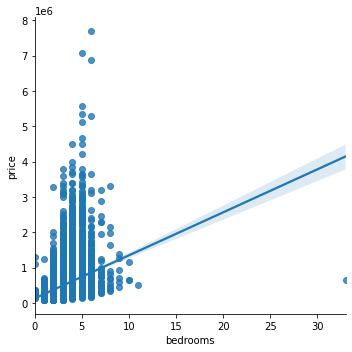

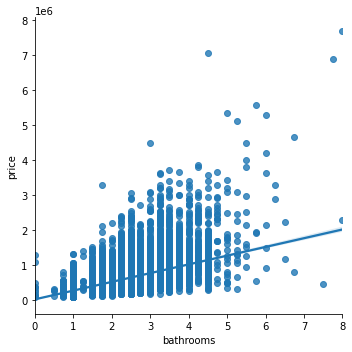

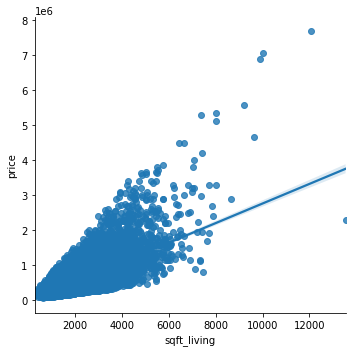

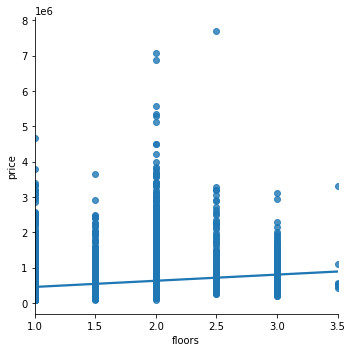

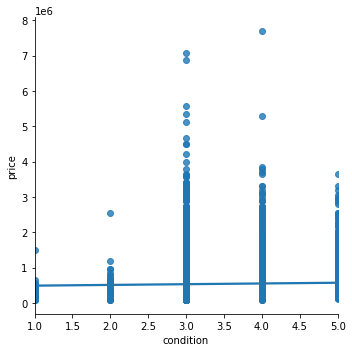

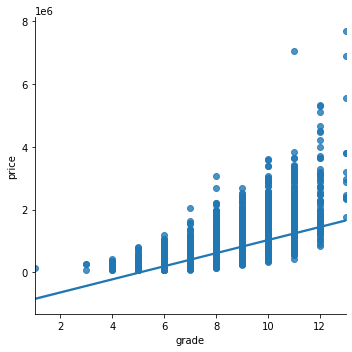

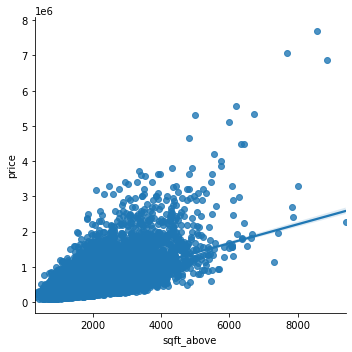

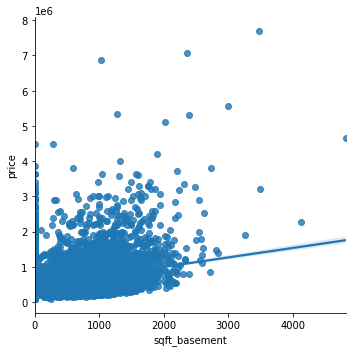

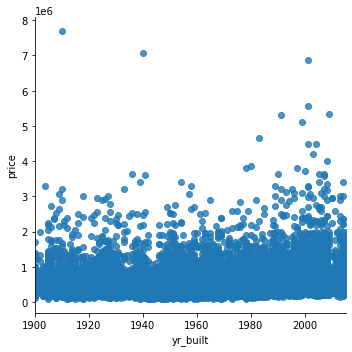

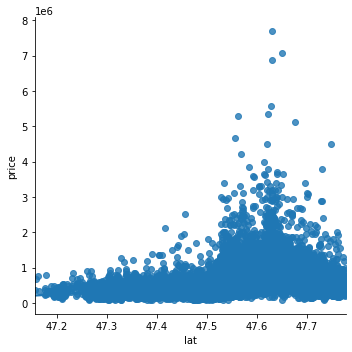

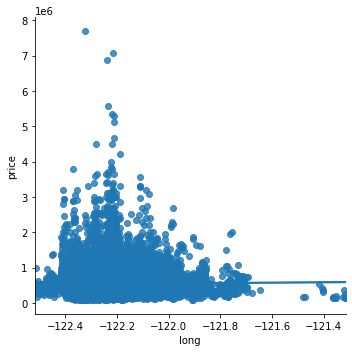

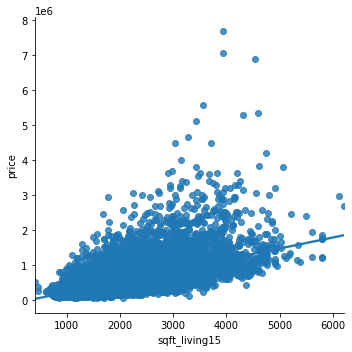

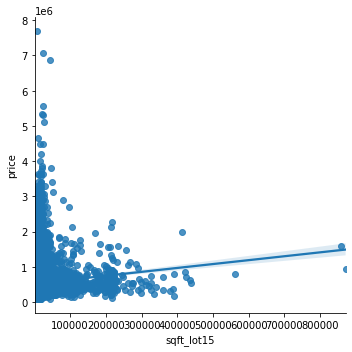

In [71]:
features=['bedrooms','bathrooms','sqft_living','floors','condition','grade','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15']

for i in features:
    sns.lmplot(x = i, y ='price', data = house_prediction)
    

In [72]:
z = np.abs(stats.zscore(house_prediction))
print(z)

[[0.86671733 0.39873715 1.44746357 ... 0.30607896 0.9433552  0.26071541]
 [0.00568792 0.39873715 0.1756067  ... 0.74634143 0.43268619 0.18786773]
 [0.98084935 1.47395936 1.44746357 ... 0.13565477 1.07013975 0.17237524]
 ...
 [0.37586519 1.47395936 1.77207762 ... 0.60432128 1.41025258 0.39414129]
 [0.38158814 0.39873715 0.50022075 ... 1.02891048 0.8412214  0.42051149]
 [0.58588173 1.47395936 1.77207762 ... 0.60432128 1.41025258 0.41794772]]


In [73]:
df = house_prediction[(z < 3).all(axis=1)]
df.shape

(20070, 14)

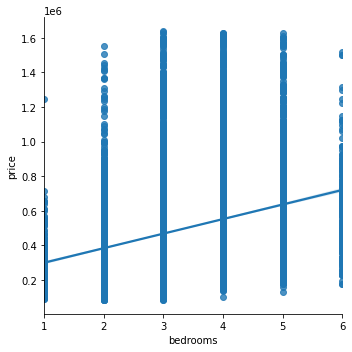

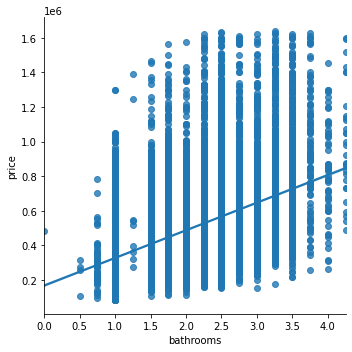

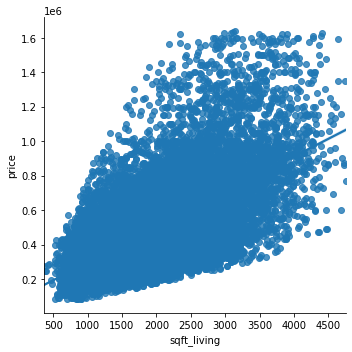

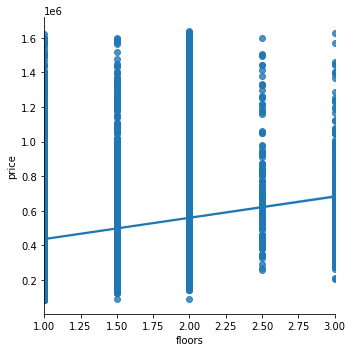

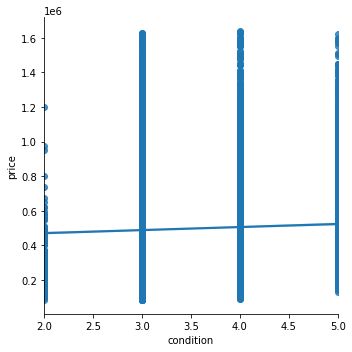

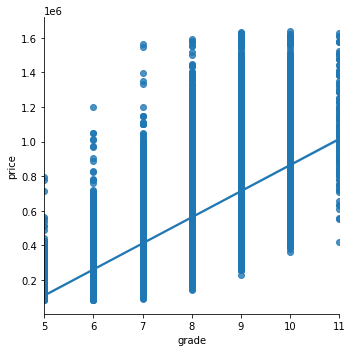

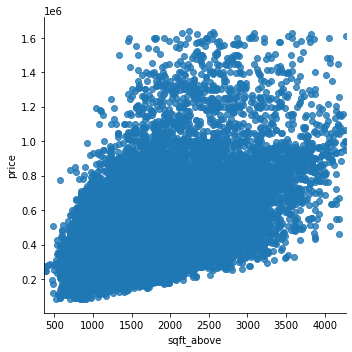

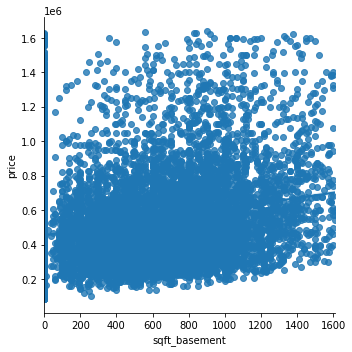

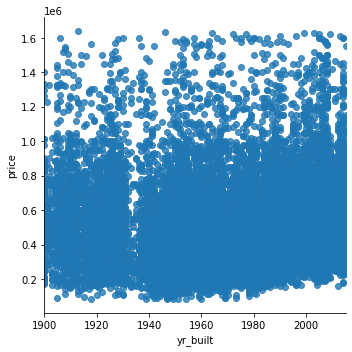

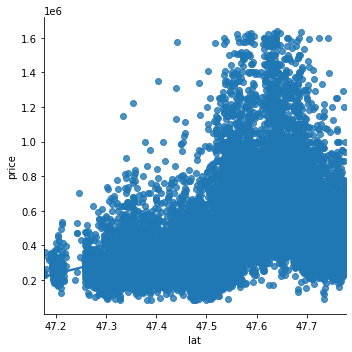

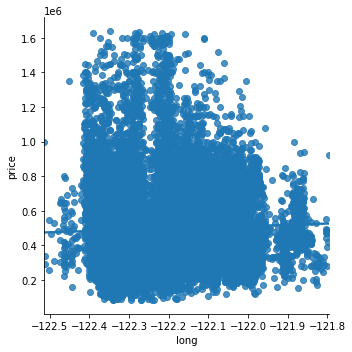

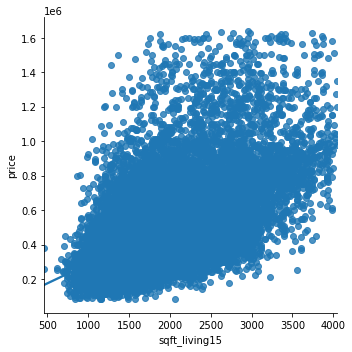

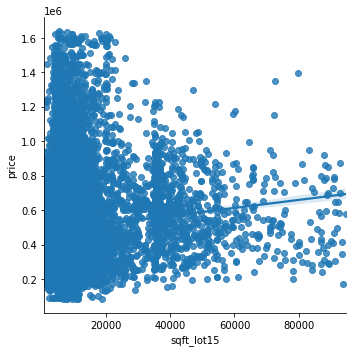

In [75]:
features=['bedrooms','bathrooms','sqft_living','floors','condition','grade','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15']

for i in features:
    sns.lmplot(x = i, y ='price', data = df)

In [76]:
column_data = df.columns.values.tolist()
print(column_data)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [77]:
df.corr(method ='pearson') 

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.292732,0.452349,0.625733,0.270020,0.046334,0.638462,0.521105,0.250330,0.027026,0.409270,0.037771,0.553855,0.090971
bedrooms,0.292732,1.000000,0.491414,0.601373,0.163781,0.019953,0.330392,0.479641,0.278230,0.165814,-0.033766,0.173334,0.391975,0.096195
bathrooms,0.452349,0.491414,1.000000,0.714244,0.512017,-0.140270,0.617359,0.631074,0.221286,0.538343,0.002606,0.260899,0.527616,0.066827
sqft_living,0.625733,0.601373,0.714244,1.000000,0.354765,-0.070025,0.712075,0.852007,0.365898,0.338208,0.033969,0.286708,0.739027,0.224137
floors,0.270020,0.163781,0.512017,0.354765,1.000000,-0.276228,0.463765,0.538253,-0.289702,0.500312,0.041207,0.138922,0.268575,-0.098312
condition,0.046334,0.019953,-0.140270,-0.070025,-0.276228,1.000000,-0.170901,-0.176407,0.181910,-0.367046,-0.014923,-0.094096,-0.105098,0.048342
grade,0.638462,0.330392,0.617359,0.712075,0.463765,-0.170901,1.000000,0.709570,0.077668,0.467165,0.106488,0.228184,0.673311,0.150312
sqft_above,0.521105,0.479641,0.631074,0.852007,0.538253,-0.176407,0.709570,1.000000,-0.175477,0.448837,-0.026053,0.398049,0.713656,0.219456
sqft_basement,0.250330,0.278230,0.221286,0.365898,-0.289702,0.181910,0.077668,-0.175477,1.000000,-0.161886,0.110191,-0.168446,0.121087,0.031368
yr_built,0.027026,0.165814,0.538343,0.338208,0.500312,-0.367046,0.467165,0.448837,-0.161886,1.000000,-0.153822,0.426444,0.337480,0.048328


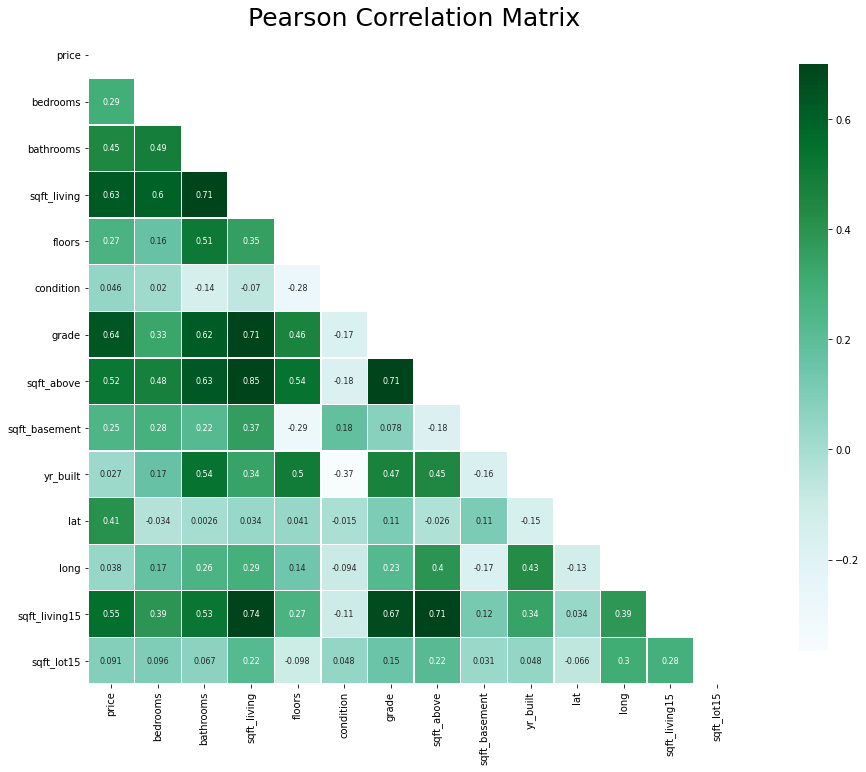

In [78]:

mask = np.zeros_like(df[column_data].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(21, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[column_data].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

#### STEP3: Model Building
* Data Splitting
* Algo Preparation
* Training

In [79]:
X=df.iloc[:,1:]
y=df.iloc[:,0]


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [81]:
    # TRAINING the Linear Regression
    # Class Linear Regression is used for Mutlivariate and Polynomial datasets too

lreg = LinearRegression()       # Creating a object for the class LinearRegression from sklearn
lreg.fit(X_train, y_train)

    # Predicting the results for the test data
y_pred = lreg.predict(X_test)

print(y_pred)
print(y_test)
print(y_pred - y_test)         # Error

# we could see lot of error between pred and test results

[426890.52881443 792414.11640704 596361.40622711 ... 604687.73231381
 843857.12817253 244112.76081292]
15684     343000.0
1768     1175000.0
5648      489000.0
15262     360000.0
13951     466950.0
           ...    
20950     605000.0
14753     312200.0
6303      410000.0
16282     632500.0
9395      285000.0
Name: price, Length: 6021, dtype: float64
15684     83890.528814
1768    -382585.883593
5648     107361.406227
15262    102228.381526
13951    -91190.300214
             ...      
20950   -209908.722649
14753    135877.300067
6303     194687.732314
16282    211357.128173
9395     -40887.239187
Name: price, Length: 6021, dtype: float64


In [82]:
# Crosscheck with R-Squared
R_sqr = lreg.score(X, y)     # returns coefficient of determination R^2 of the prediction.
print(R_sqr)

0.6710963013953664


In [84]:
#train a basic multiple regression model and print out the coefficients
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          1.634e+04
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                        0.00
Time:                        15:16:16   Log-Likelihood:                     -1.8676e+05
No. Observations:               14049   AIC:                                  3.735e+05
Df Residuals:                   14037   BIC:                                  3.736e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

#### STEP4: Model Evaluation
* Testing
* Prediction
* Visualization

In [85]:
import xgboost

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
    }

[15:16:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


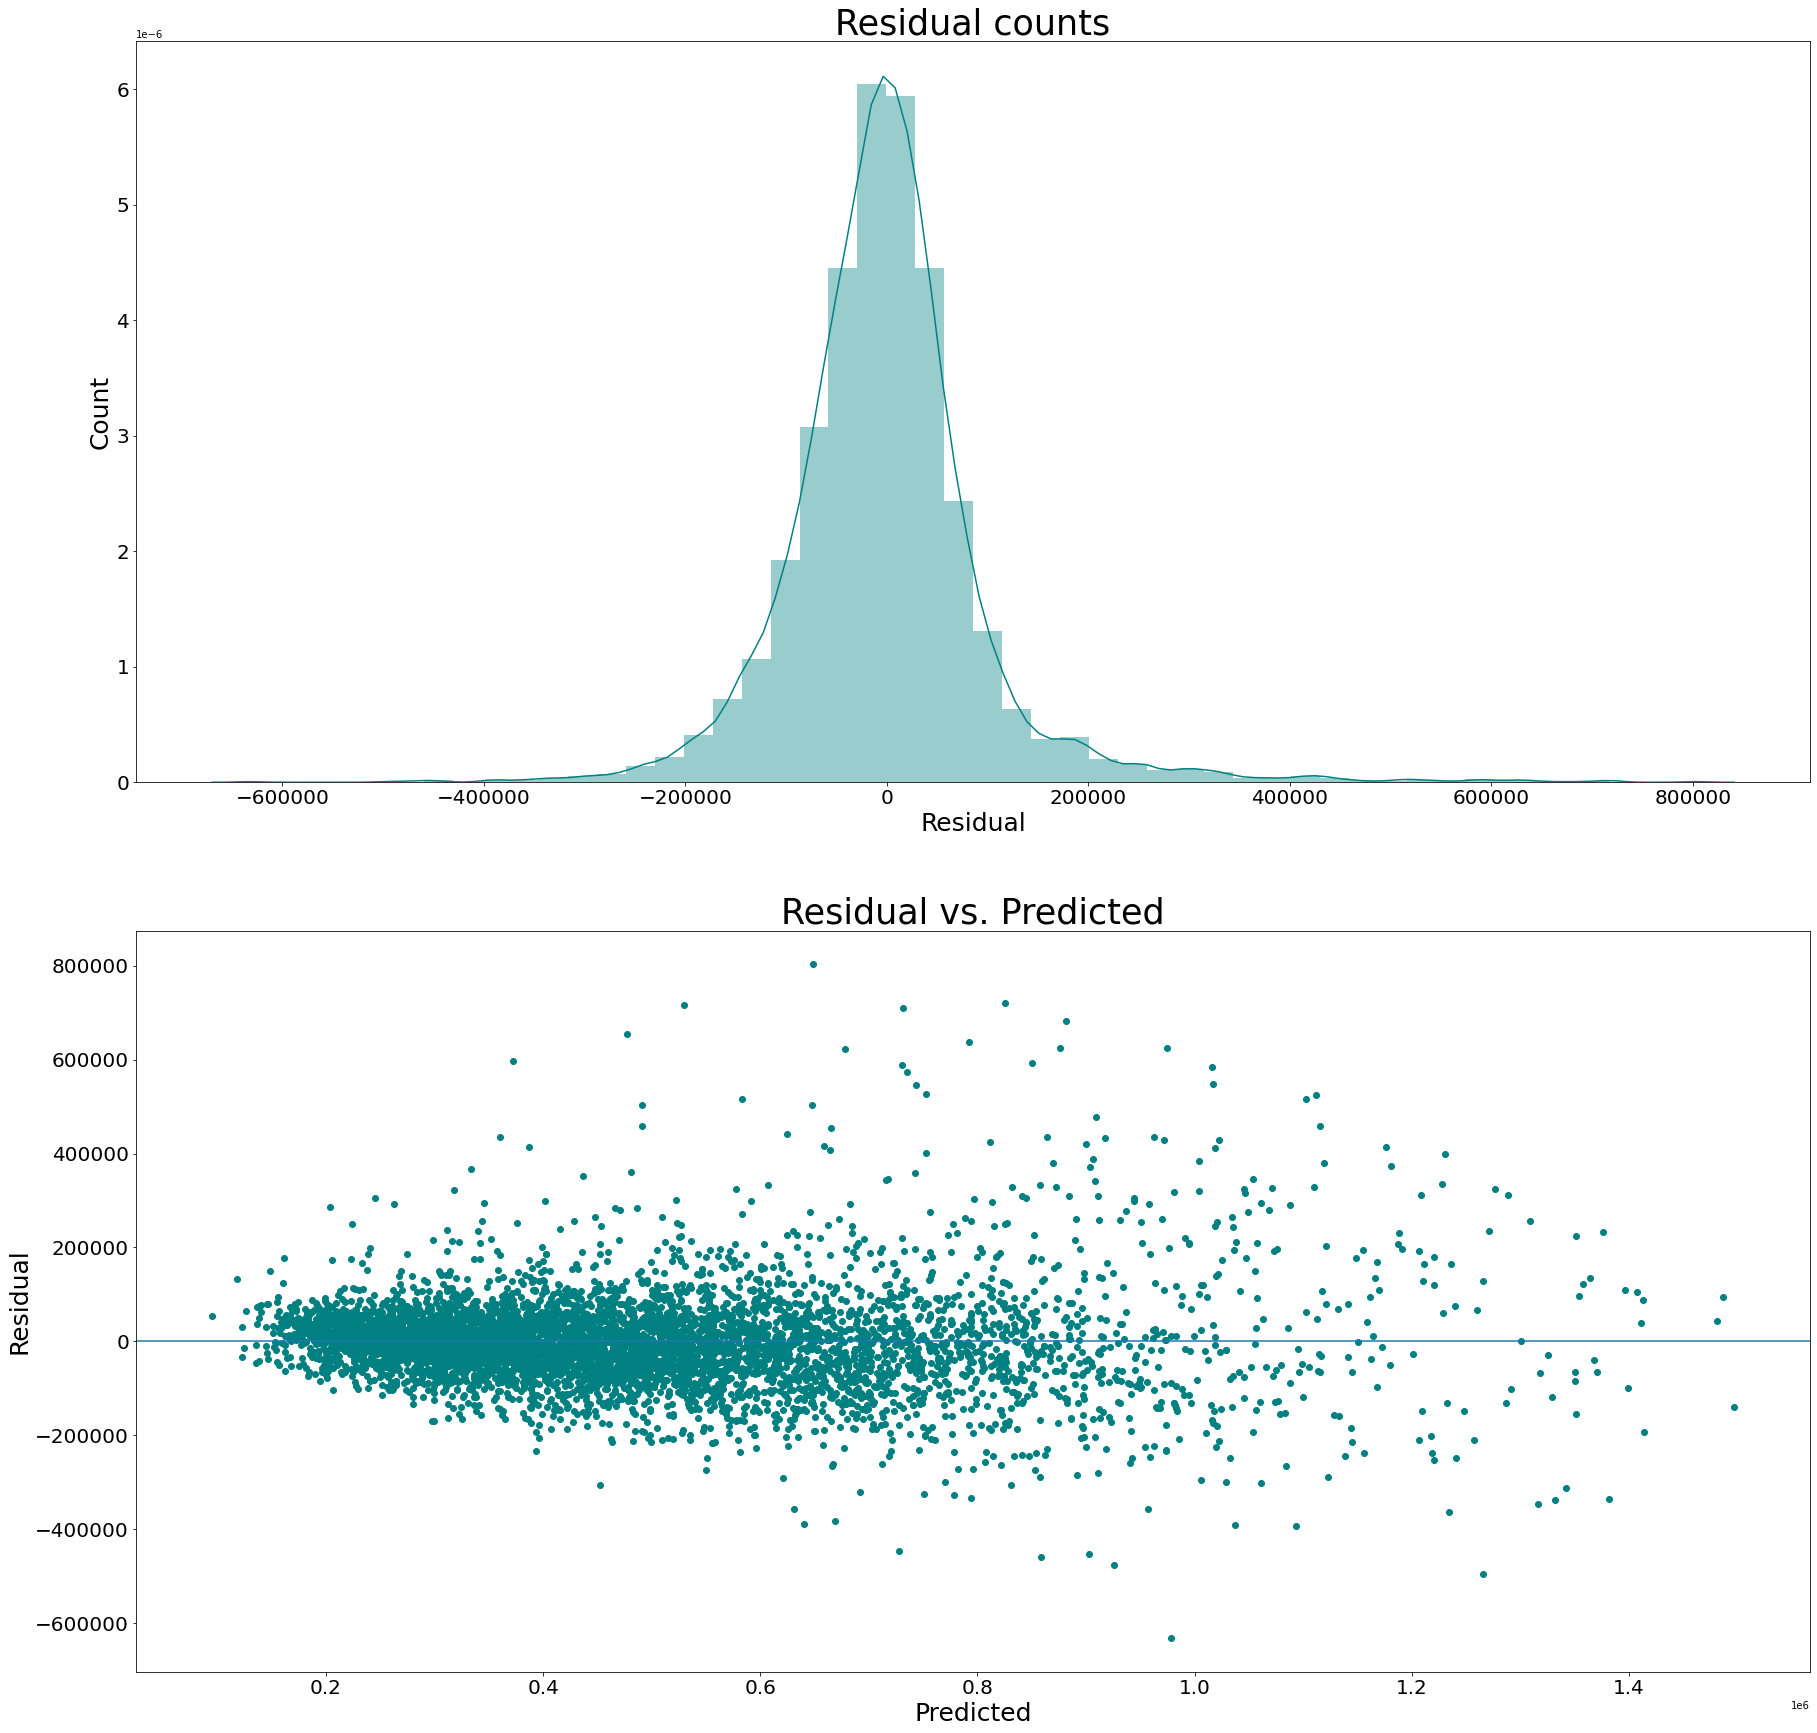

RMSE of XGBoost:
98563.63094160499


In [88]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
regressor.fit(X_train, y_train)

predicted = regressor.predict(X_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE of XGBoost:')
print(rmse)

In [89]:
from sklearn.metrics import r2_score
print('Variance score of XGBoost: %.2f' % r2_score(y_test, predicted))

Variance score of XGBoost: 0.83


In [90]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
modelcatBoost = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelcatBoost, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Absolute Error: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
modelCat = CatBoostRegressor(verbose=0, n_estimators=100)
modelCat.fit(X_train, y_train)

Mean Absolute Error: -60057.635 (2019.952)


In [91]:
# predict the results
y_pred=modelCat.predict(X_test)

In [92]:
y_pred

array([327267.49749196, 956386.88648526, 464608.68911741, ...,
       423275.54395045, 746335.83562547, 213176.47345243])

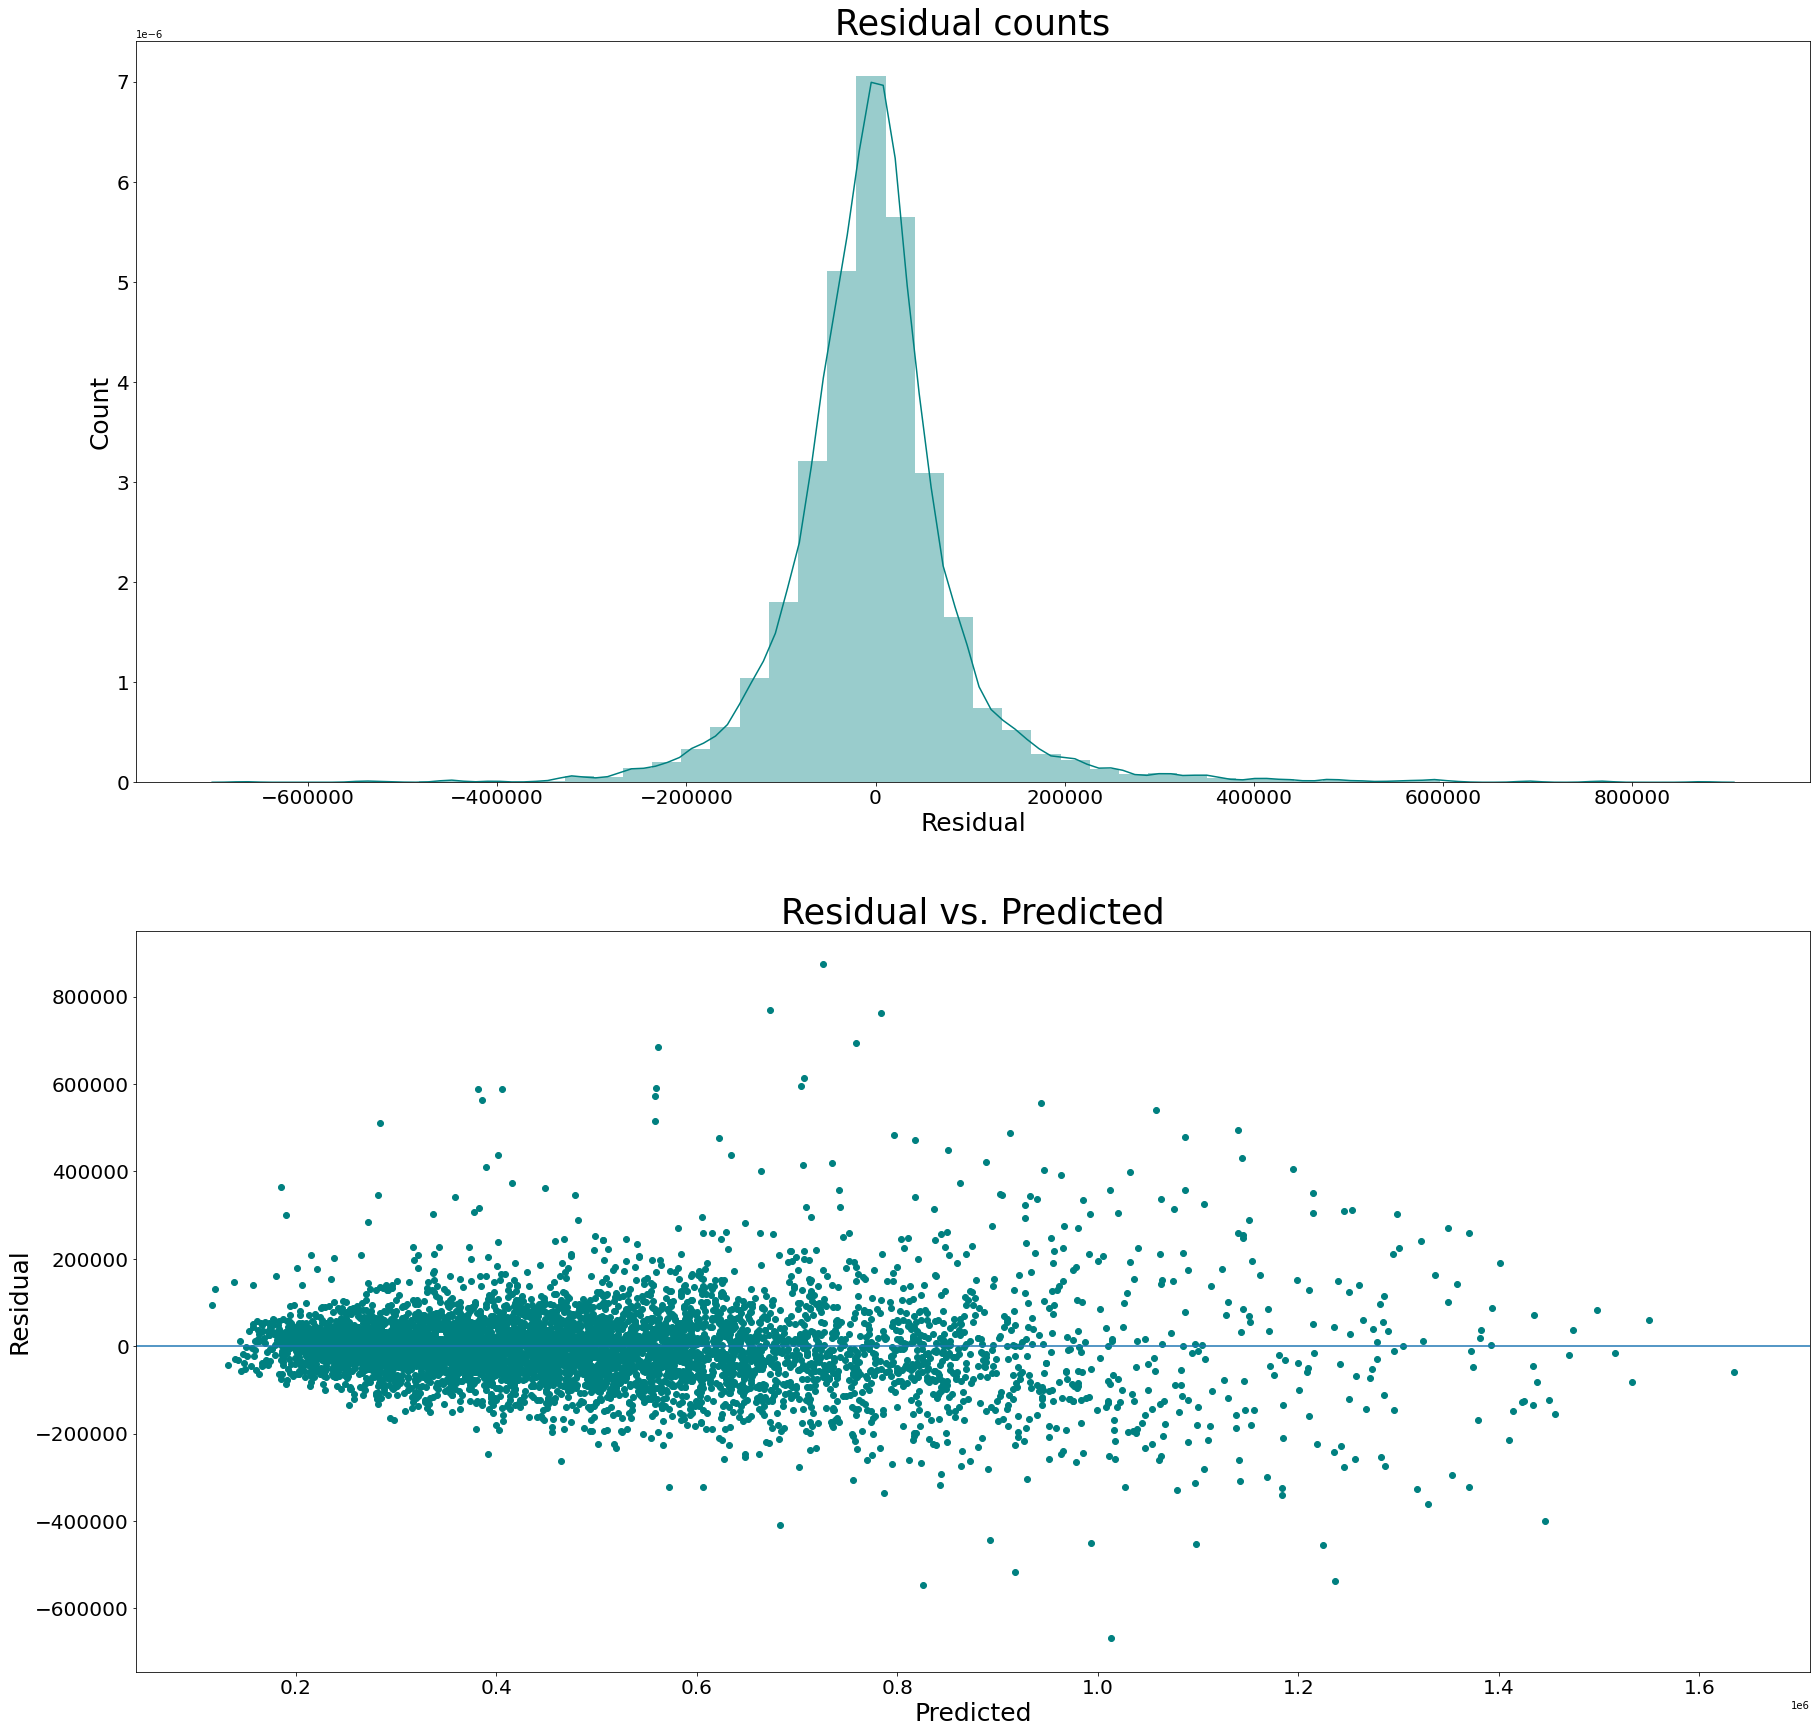

RMSE of CatBoost:
93239.3418992405


In [93]:
predicted = modelCat.predict(X_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE of CatBoost:')
print(rmse)

In [94]:
from sklearn.metrics import r2_score
print('Variance score of CatBoost: %.2f' % r2_score(y_test, predicted))

Variance score of CatBoost: 0.85


#### STEP5: Model Optimization
* Efficiency
* Validation
* Deployment

###LightGBM Regressor and Tuning Hyperparameter

In [95]:
modelLightGBM.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse', early_stopping_rounds=100)

[1]	valid_0's rmse: 224288	valid_0's l2: 5.03049e+10
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 209097	valid_0's l2: 4.37216e+10
[3]	valid_0's rmse: 195770	valid_0's l2: 3.83258e+10
[4]	valid_0's rmse: 183704	valid_0's l2: 3.3747e+10
[5]	valid_0's rmse: 173038	valid_0's l2: 2.9942e+10
[6]	valid_0's rmse: 163716	valid_0's l2: 2.68031e+10
[7]	valid_0's rmse: 155265	valid_0's l2: 2.41071e+10
[8]	valid_0's rmse: 148043	valid_0's l2: 2.19168e+10
[9]	valid_0's rmse: 141679	valid_0's l2: 2.00729e+10
[10]	valid_0's rmse: 136062	valid_0's l2: 1.85128e+10
[11]	valid_0's rmse: 131103	valid_0's l2: 1.71881e+10
[12]	valid_0's rmse: 126978	valid_0's l2: 1.61233e+10
[13]	valid_0's rmse: 123198	valid_0's l2: 1.51777e+10
[14]	valid_0's rmse: 119932	valid_0's l2: 1.43836e+10
[15]	valid_0's rmse: 116930	valid_0's l2: 1.36727e+10
[16]	valid_0's rmse: 114204	valid_0's l2: 1.30425e+10
[17]	valid_0's rmse: 112133	valid_0's l2: 1.25739e+10
[18]	valid_0's rmse: 110394	va

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

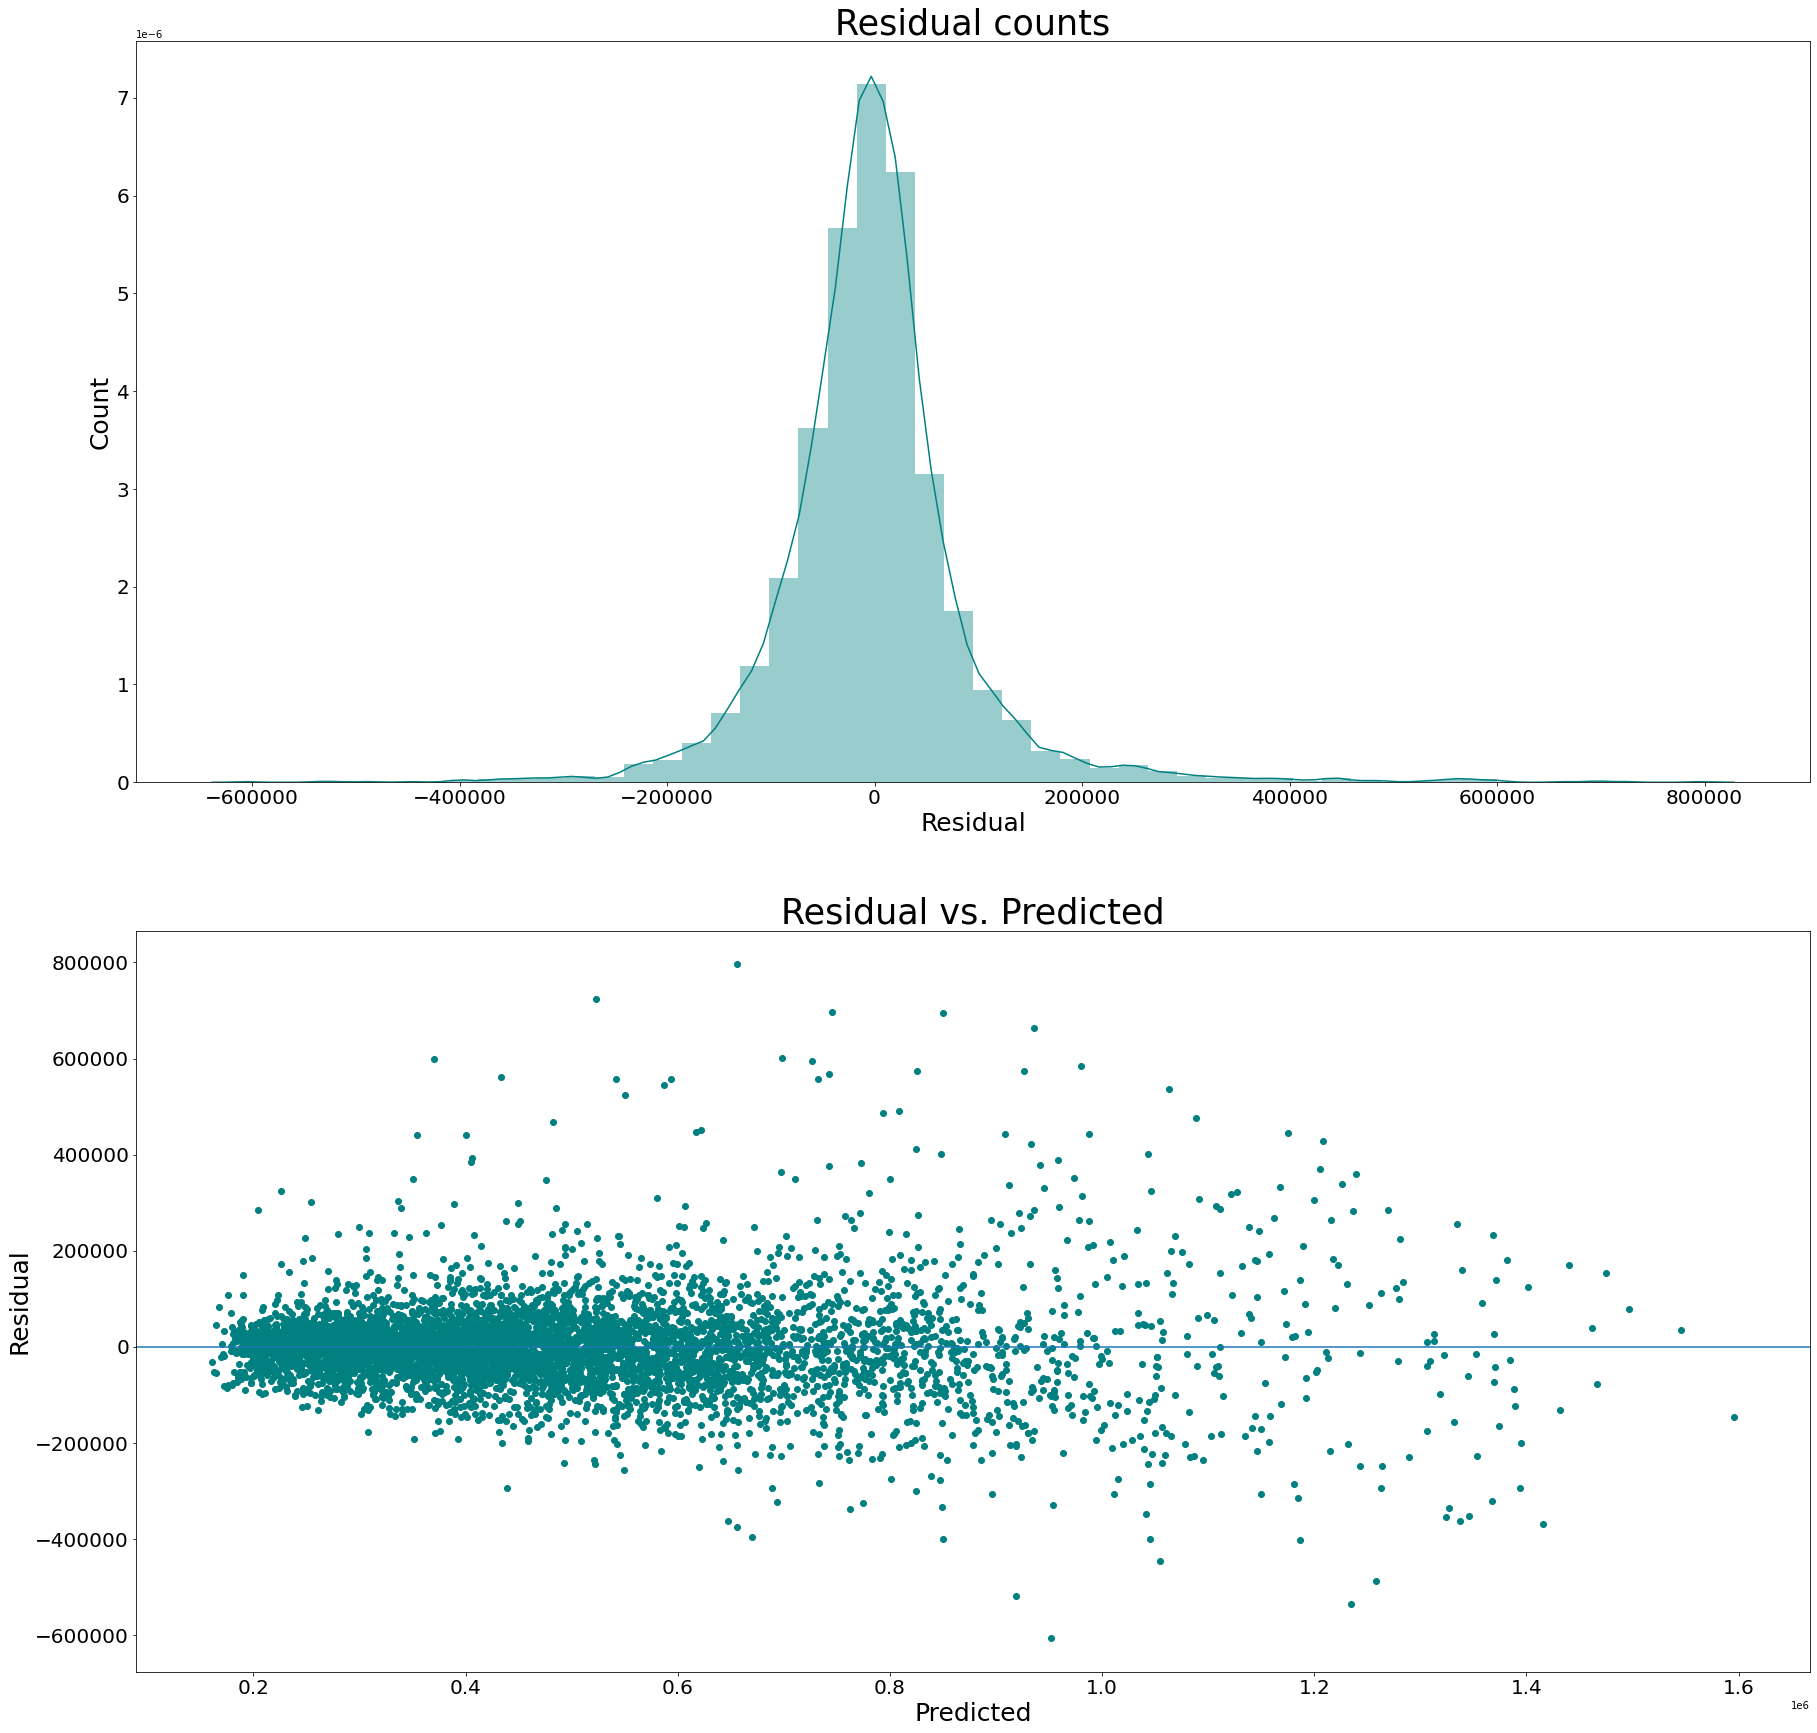

RMSE of LightGBM:
92104.57065445241


In [97]:
predicted = modelLightGBM.predict(X_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE of LightGBM:')
print(rmse)

In [98]:
from sklearn.metrics import r2_score
print('Variance score of LightGBM: %.2f' % r2_score(y_test, predicted))

Variance score of LightGBM: 0.85


In [113]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [115]:
model = GaussianProcessRegressor()

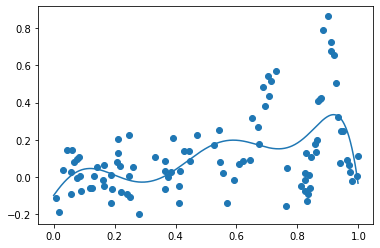

In [4]:
# example of a gaussian process surrogate function
from math import sin
from math import pi
from numpy import arange
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from matplotlib import pyplot
from warnings import catch_warnings
from warnings import simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor

# objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 1, 0.001))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot the surrogate function
plot(X, y, model)